In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import plotly.express as ps 
from datetime import datetime

In [2]:
pwd = os.getcwd()
file_path= os.path.join(pwd ,'analysis_data.xlsx')
data = pd.read_excel(file_path)

In [ ]:
#data= data.drop(['product_id','online_order', 'order_status','brand','product_line', 'product_size','product_first_sold_date','first_name', 'last_name','DOB','job_title','deceased_indicator','address', 'postcode','country', 'list_price','standard_cost'], axis=1)

In [18]:
#some commands used in between 
#data.dtypes
#data.state.value_counts()
#data.head()
#data.columns
#data.tail(5)
#data.shape

In [7]:
past_year = data.groupby(['customer_id', 'transaction_id' ])[['past_3_years_bike_related_purchases']].sum()

# Recency 

In [4]:
comparision_date = data['transaction_date'].max()
#comparision_date
#data['recency'] = comparision_date - data['transaction_date'] 
recency = data.groupby(['customer_id']).agg({'transaction_date' : lambda x:((comparision_date - x.max()).days)})
recency

,transaction_date
customer_id,
1,7
2,128
9,78
12,67
13,27
...,...
3493,93
3494,4
3495,13


# Frequency 

In [5]:
freq = data.drop_duplicates(subset='transaction_id').groupby(['customer_id'])[['transaction_id']].count()
freq

,transaction_id
customer_id,
1,11
2,3
9,6
12,7
13,7
...,...
3493,6
3494,4
3495,7


# Monetary Value 

In [6]:
monetary = data.groupby(['customer_id'])[['Profit']].sum()
monetary

,Profit
customer_id,
1,3018.09
2,2226.26
9,2353.11
12,3540.03
13,4337.38
...,...
3493,3728.88
3494,2755.11
3495,3847.65


# RFM

In [25]:
rfm = pd.concat([recency, freq, monetary, ], axis=1)
recency.columns= ['recency']
freq.columns = ['freq']
monetary.columns = ['monetary']

rfm

,recency,freq,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38
...,...,...,...
3493,93,6,3728.88
3494,4,4,2755.11
3495,13,7,3847.65


In [37]:
rfm['rfm_score'] = rfm['recency'] + rfm['freq'] + rfm ['monetary'] 
rfm['RFM_value'] =  100* rfm['recency'] + 10*rfm['freq'] + rfm ['monetary']
rfm

,recency,freq,monetary,Clusturs,RFM_value,rfm_score
customer_id,,,,,,
1,7,11,3018.09,4,3828.09,3036.09
2,128,3,2226.26,3,15056.26,2357.26
9,78,6,2353.11,1,10213.11,2437.11
12,67,7,3540.03,1,10310.03,3614.03
13,27,7,4337.38,1,7107.38,4371.38
...,...,...,...,...,...,...
3493,93,6,3728.88,1,13088.88,3827.88
3494,4,4,2755.11,2,3195.11,2763.11
3495,13,7,3847.65,1,5217.65,3867.65


# Scaling the data 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

# deciding on number of clusters before K means 

In [33]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
    kmeans  = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

c:\Users\Admin\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Admin\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

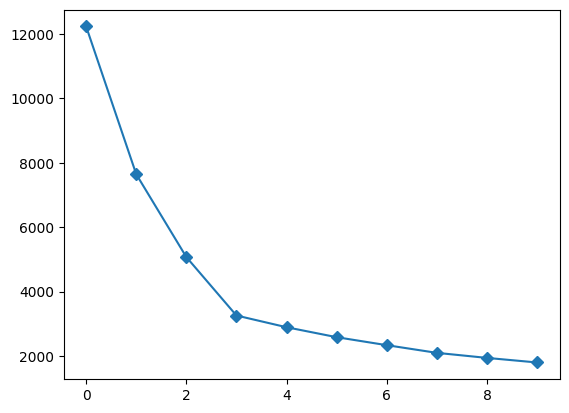

In [34]:
plt.plot(inertia, marker='D')


 we use the elbow point, i decided on 3 clustures 

# Kmeans clustoring

In [39]:
#kmeans  = KMeans(n_clusters=3)
kmeans  = KMeans(n_clusters=4)
kmeans.fit(scaled)
rfm['Clusturs']= (kmeans.labels_ +1)

c:\Users\Admin\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
rfm.columns
#rfm['Clusturs'].unique()

Index(['recency', 'freq', 'monetary', 'Clusturs', 'RFM_value', 'rfm_score'], dtype='object')

In [22]:
#rfm.rename(columns={'transaction_date': 'recency', 'transaction_id': 'freq', 'Profit': 'monetary'}, inplace=True)


In [45]:
rfm = rfm.drop(['Customer_segment','rfm_score','RFM_value'], axis=1)

In [46]:
rfm.head()

,recency,freq,monetary,Clusturs
customer_id,,,,
1,7,11,3018.09,2
2,128,3,2226.26,1
9,78,6,2353.11,3
12,67,7,3540.03,3
13,27,7,4337.38,3


In [47]:
group = rfm.groupby(['Clusturs'])[['recency', 'freq', 'monetary']].mean()
group

,recency,freq,monetary
Clusturs,,,
1,178.310345,3.359195,1710.542471
2,33.515707,8.939791,5889.568691
3,48.313266,6.371237,3608.459142
4,42.113415,4.069512,1766.604415


1 - mod r , low f , low m      - BROWNZ - lapsed customer,<br>
2 - mod r , mod f, mod m       - GOLD - avg customer  <br>
3 - High r , low f , low m     - SILVER - new customer <br>
4 - low r , high f , high m    - Platinum-  target customer high value 

1 - low r , high f , high m      - lapsed customer,, target message may activate them <br>
2 - high r , low f, mod m        - newly visited customer  <br>
3 - low r , mod f , mod m        - Avg-customer <br>

In [48]:
def cluster_name(row):
    if row['Clusturs'] == 1:
        return 'BROWNZ'
    elif row['Clusturs'] == 2:
        return 'GOLD'
    elif row['Clusturs'] == 3:
        return 'SILVER'
    elif row['Clusturs'] == 4:
        return 'PLATINUM'

In [49]:
rfm['Customer_segment'] = rfm.apply(cluster_name, axis=1)

In [88]:
rfm.columns

Index(['recency', 'freq', 'monetary', 'Clusturs', 'Customer_segment'], dtype='object')

In [50]:
result = rfm['Customer_segment'].value_counts()
result

Customer_segment
SILVER      897
PLATINUM    820
GOLD        382
BROWNZ      348
Name: count, dtype: int64

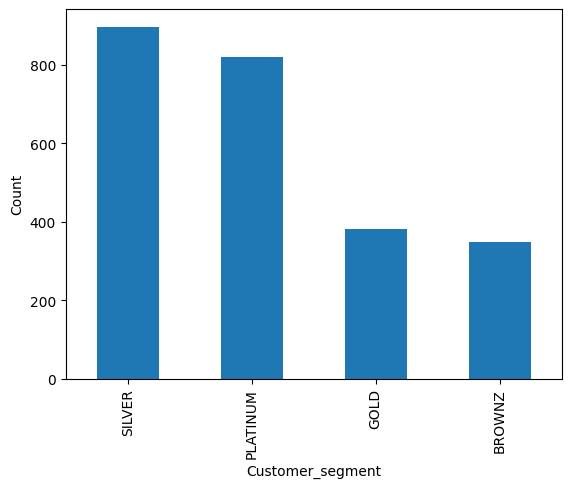

In [91]:
result.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Customer_segment')
#plt.title('Sum of RFM Value by Customer Segment')
plt.show()

In [53]:
#rfm.head()
#rfm.info()
#rfm['customer_id'] = rfm.index
#rfm = rfm.drop(['customer_id'], axis=1)
rfm

,recency,freq,monetary,Clusturs,Customer_segment
customer_id,,,,,
1,7,11,3018.09,2,GOLD
2,128,3,2226.26,1,BROWNZ
9,78,6,2353.11,3,SILVER
12,67,7,3540.03,3,SILVER
13,27,7,4337.38,3,SILVER
...,...,...,...,...,...
3493,93,6,3728.88,3,SILVER
3494,4,4,2755.11,4,PLATINUM
3495,13,7,3847.65,3,SILVER


In [54]:
rfm.to_excel('rfm.xlsx', index=False)
rfm.to_csv('rfm..csv', index=False)

In [ ]:
rfm.index

In [ ]:
data.index

In [55]:
dataset  = pd.merge(data, rfm, on='customer_id')

In [56]:
dataset.columns

Index(['transaction_id', 'customer_id', 'transaction_date', 'product_class',
       'Profit', 'gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'Age',
       'state', 'property_valuation', 'recency', 'freq', 'monetary',
       'Clusturs', 'Customer_segment'],
      dtype='object')

In [57]:
dataset.to_excel('old_data.xlsx', index=False)
#rfm.to_csv('rfm..csv', index=False)

In [59]:
dataset.head()

,transaction_id,customer_id,transaction_date,product_class,Profit,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation,recency,freq,monetary,Clusturs,Customer_segment
0,1,2950,2017-02-25,medium,17.87,M,19,Financial Services,Mass Customer,Yes,10,68,VIC,6,75,3,645.99,4,PLATINUM
1,11065,2950,2017-10-16,medium,448.68,M,19,Financial Services,Mass Customer,Yes,10,68,VIC,6,75,3,645.99,4,PLATINUM
2,18923,2950,2017-04-26,medium,179.44,M,19,Financial Services,Mass Customer,Yes,10,68,VIC,6,75,3,645.99,4,PLATINUM
3,2,3120,2017-05-21,medium,1702.55,F,89,Health,Mass Customer,Yes,10,44,NSW,5,20,7,4179.11,3,SILVER
4,6862,3120,2017-10-05,high,451.65,F,89,Health,Mass Customer,Yes,10,44,NSW,5,20,7,4179.11,3,SILVER


In [60]:
dataset.columns

Index(['transaction_id', 'customer_id', 'transaction_date', 'product_class',
       'Profit', 'gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'Age',
       'state', 'property_valuation', 'recency', 'freq', 'monetary',
       'Clusturs', 'Customer_segment'],
      dtype='object')

In [69]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70 ,80 ,float('inf')]
age_labels = ['<20', '20-27', '28-37', '37-47', '48-57','57-67','67-77', '77-87', '87+']
dataset['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [70]:
segment_age_pivot = dataset.pivot_table(index='Age Category', columns='wealth_segment', values='Profit', aggfunc='sum')

In [71]:
segment_age_pivot

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
Age Category,,,
<20,0.00,0.00,0.00
20-27,0.00,0.00,0.00
28-37,272715.77,283887.51,570521.82
37-47,301409.80,347067.60,631706.35
48-57,658293.47,643744.66,1318703.47
57-67,360928.16,327571.78,656400.27
67-77,295834.68,287158.07,563940.05
77-87,14.23,1810.54,2173.32
87+,666.16,1796.96,4142.82


Text(0, 0.5, 'Profit')

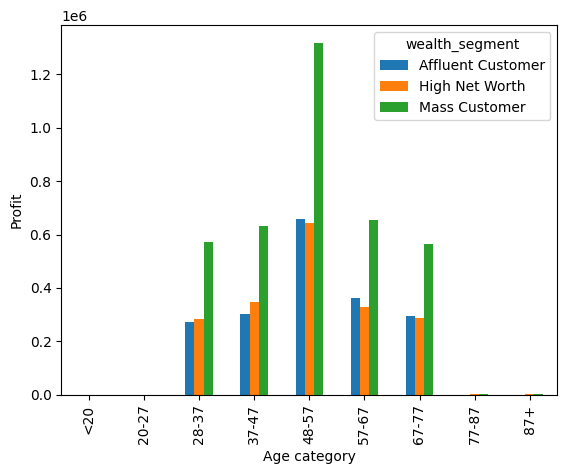

In [72]:
segment_age_pivot.plot(kind='bar')
plt.xlabel("Age category")
plt.ylabel("Profit")

In [73]:
property_bins = [0, 5, 10, float('inf')]
property_labels = ['<5 Low value', '5-10 MID value', '10-15 High Value']
dataset['Property_Category'] = pd.cut(data['property_valuation'], bins=property_bins, labels=property_labels)

In [74]:
segment_age_pivot = dataset.pivot_table(index='Property_Category', columns='Customer_segment', values='Profit', aggfunc='sum')
segment_age_pivot

Customer_segment,BROWNZ,GOLD,PLATINUM,SILVER
Property_Category,,,,
<5 Low value,142119.25,564703.62,337244.54,747938.48
5-10 MID value,375718.69,1406659.61,934900.07,2107134.35
10-15 High Value,77430.84,278452.01,176471.01,381715.02


Text(0, 0.5, 'Profit')

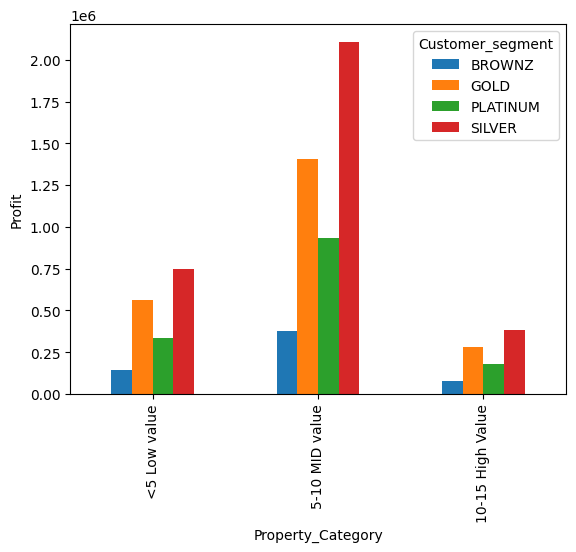

In [76]:
segment_age_pivot.plot(kind='bar')
plt.ylabel("Profit")

In [1]:
dataset['tenure_category'].plot(kind='area')

NameError: name 'dataset' is not defined

In [82]:
tenure_bins = [0, 5, 15, 20, float('inf')]
tenure_bins_labels = ['<5', '6-10,', '11-20', '>20']
dataset['tenure_category'] = pd.cut(dataset['tenure'], bins=tenure_bins, labels=tenure_bins_labels)

In [83]:
segment_tenure_pivot = dataset.pivot_table(index='tenure_category', columns='Customer_segment', values='Profit', aggfunc='sum')
segment_tenure_pivot

Customer_segment,BROWNZ,GOLD,PLATINUM,SILVER
tenure_category,,,,
<5,116075.41,485367.03,352899.78,644533.28
"6-10,",350406.41,1191276.33,735138.08,1752790.54
11-20,111926.55,509955.19,305884.88,736219.17
>20,16860.41,63216.69,54692.88,103244.86


Text(0, 0.5, 'Profit')

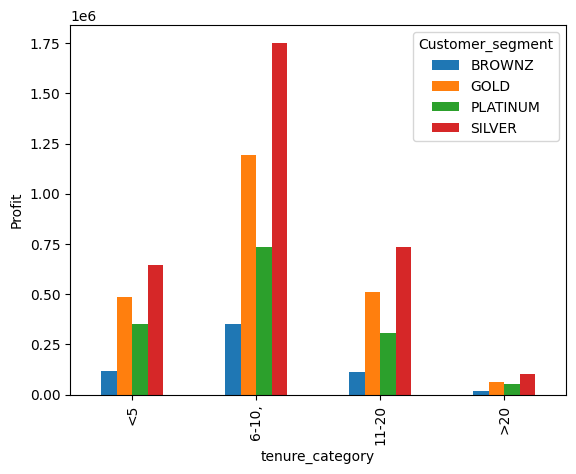

In [85]:
segment_tenure_pivot.plot(kind='bar')
plt.ylabel("Profit")